# Normalize color by center
+ date: 2018-02-23
+ tags: matplotlib

Gist address: https://gist.github.com/peijunz/b5f5fa89f7e1412686b9eaa5646be730

In [3]:
from matplotlib.colors import Normalize

class CenterNorm(Normalize):
    def __init__(self, vc=0, cc=0.5, vmin=None, vmax=None, clip=False):
        '''
        Args:
            vc      value of center
            cc      color of center
        '''
        Normalize.__init__(self, vmin, vmax, clip)
        assert 0< cc < 1, "Central color should be in (0, 1)"
        self.vc = vc
        self.cc = cc
    def __call__(self, value, clip=None):
        dv = np.array([self.vc - self.vmin, self.vmax - self.vc])
        dc = np.array([self.cc, 1 - self.cc])
        k = 1/max(dv/dc)
        return np.ma.masked_array((value-self.vc)*k+self.cc)

In [4]:
def cond(x, mask):
    y=x.copy()
    y[~mask] = nan
    return y

In [22]:
def imshow_xyz(ax, x, y, z, *args, **argv):
    '''x is x of xoy rhs system, i.e. j index of image
       y is y of xoy rhs system, i.e. -i index of image
       z is function of x, y, i.e. z[i, j]=f(x[i], y[j])
       Image is actual image matrix, I[i, j]=z[-j, i]'''
    assert z.shape == (len(x), len(y)), "Shape unmatched"
    ex = np.mean(np.diff(x))/2
    ey = np.mean(np.diff(y))/2
    argv['extent'] = (x[0]-ex, x[-1]+ex, y[0]-ey, y[-1]+ey)
    return ax.imshow((z.T)[::-1, :], *args, **argv)

def zgrid(x, y, f):
    z = x[:, np.newaxis]+1j*y[np.newaxis, :]
    return np.vectorize(f)(z)

def xygrid(x, y):
    return x[:, np.newaxis], y[np.newaxis, :]

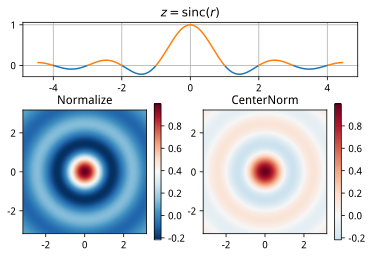

In [27]:
import matplotlib.gridspec as gridspec

# Generate data to plot
x = linspace(-pi, pi, 100)
y = linspace(-pi, pi, 100)
r = sqrt(2)*linspace(-pi, pi, 300)
xz, yz = xygrid(x, y)
z = sinc(sqrt(xz**2+yz**2))
norms = [Normalize(), CenterNorm()]
titles = ["Normalize", "CenterNorm"]

gs = gridspec.GridSpec(3,4)
# Plot z = sinc(r)
ax = plt.subplot(gs[0, :])
pos = cond(r, sinc(r)>=0)#-1e-2)
neg = cond(r, sinc(r)<=0)#1e-2)
ax.plot(neg, sinc(neg))
ax.plot(pos, sinc(pos))
ax.set_title(r'$z=\mathrm{sinc}(r)$')
ax.grid()

# Plot comparation between two color normalization choices
gs.update(hspace=0.5, wspace=0.4)
for i in range(2):
    ax = plt.subplot(gs[1:, 2*i:2*(i+1)])
    c = imshow_xyz(ax, x, y, z, cmap="RdBu_r", norm=norms[i], interpolation='bilinear');
    ax.set_title(titles[i])#, y=-0.3)
    plt.colorbar(c, ax=ax, orientation='vertical');